# Analysis Ford GoBike System Data Feb-2019
###  By Wael Abd Elhady Tohamy

### Introduction
Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019.The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. (https://en.wikipedia.org/wiki/Bay_Wheels)

## Preliminary Wrangling

In [109]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gathering and Assessing Data

In [110]:
# Read Dataset and test
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [111]:
# dataset recognition
df.shape

(183412, 16)

In [112]:
# dataset recognition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [113]:
# dataset recognition
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [114]:
# dataset recognition
df.duplicated().sum()

0

In [115]:
# dataset recognition
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [116]:
# dataset recognition
df[df.duration_sec==61].count()

duration_sec               18
start_time                 18
end_time                   18
start_station_id           18
start_station_name         18
start_station_latitude     18
start_station_longitude    18
end_station_id             18
end_station_name           18
end_station_latitude       18
end_station_longitude      18
bike_id                    18
user_type                  18
member_birth_year          18
member_gender              18
bike_share_for_all_trip    18
dtype: int64

In [117]:
# dataset recognition
df[df.duration_sec==85444].count()

duration_sec               1
start_time                 1
end_time                   1
start_station_id           1
start_station_name         1
start_station_latitude     1
start_station_longitude    1
end_station_id             1
end_station_name           1
end_station_latitude       1
end_station_longitude      1
bike_id                    1
user_type                  1
member_birth_year          0
member_gender              0
bike_share_for_all_trip    1
dtype: int64

In [118]:
# dataset recognition
df.nlargest(10,['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No
85465,84548,2019-02-16 15:48:25.0290,2019-02-17 15:17:33.0800,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,6301,Subscriber,1981.0,Male,No
153705,83772,2019-02-05 12:44:54.2860,2019-02-06 12:01:06.6310,78.0,Folsom St at 9th St,37.773717,-122.411647,345.0,Hubbell St at 16th St,37.766483,-122.398279,3405,Customer,NaN,NaN,No
127999,83519,2019-02-09 15:16:17.5370,2019-02-10 14:28:17.2700,72.0,Page St at Scott St,37.772406,-122.435650,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5561,Customer,1990.0,Male,No
112435,83407,2019-02-11 16:25:33.0690,2019-02-12 15:35:40.9560,77.0,11th St at Natoma St,37.773507,-122.416040,344.0,16th St Depot,37.766349,-122.396292,1842,Customer,1988.0,Male,No
5203,83195,2019-02-27 14:47:23.1810,2019-02-28 13:53:58.4330,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,5781,Subscriber,1962.0,Female,Yes
95750,82512,2019-02-14 13:56:21.7280,2019-02-15 12:51:34.3150,368.0,Myrtle St at Polk St,37.785434,-122.419622,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6152,Customer,1998.0,Other,No
173365,82385,2019-02-02 13:07:43.0360,2019-02-03 12:00:48.1750,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,2933,Customer,NaN,NaN,No
8631,81549,2019-02-27 09:41:38.5520,2019-02-28 08:20:48.3860,138.0,Jersey St at Church St,37.750900,-122.427411,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,2266,Subscriber,1963.0,Female,No
176987,80891,2019-02-01 11:05:18.9760,2019-02-02 09:33:30.1690,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,55.0,Webster St at Grove St,37.777053,-122.429558,3133,Customer,NaN,NaN,No


In [119]:
# dataset recognition
df.nsmallest(20,['duration_sec'])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
18578,61,2019-02-26 18:23:44.2830,2019-02-26 18:24:45.5230,368.0,Myrtle St at Polk St,37.785434,-122.419622,368.0,Myrtle St at Polk St,37.785434,-122.419622,5333,Subscriber,1989.0,Female,No
19581,61,2019-02-26 16:40:53.1210,2019-02-26 16:41:54.4510,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5306,Subscriber,1987.0,Female,No
27017,61,2019-02-25 10:31:18.4150,2019-02-25 10:32:19.7480,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5921,Subscriber,1972.0,Male,Yes
44301,61,2019-02-22 15:09:57.0480,2019-02-22 15:10:58.7420,310.0,San Fernando St at 4th St,37.335885,-121.885660,280.0,San Fernando St at 7th St,37.337122,-121.883215,6347,Subscriber,1989.0,Male,Yes
44787,61,2019-02-22 13:56:21.9760,2019-02-22 13:57:23.4650,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,81.0,Berry St at 4th St,37.775880,-122.393170,6150,Subscriber,1931.0,Male,No
51120,61,2019-02-21 18:27:34.9930,2019-02-21 18:28:36.6300,113.0,Franklin Square,37.764555,-122.410345,100.0,Bryant St at 15th St,37.767100,-122.410662,6515,Subscriber,1984.0,Male,No
58992,61,2019-02-20 21:44:00.1540,2019-02-20 21:45:01.2350,85.0,Church St at Duboce Ave,37.770083,-122.429156,85.0,Church St at Duboce Ave,37.770083,-122.429156,4351,Subscriber,1994.0,Male,No
64088,61,2019-02-20 13:08:18.2850,2019-02-20 13:09:19.4330,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,80.0,Townsend St at 5th St,37.775235,-122.397437,2090,Subscriber,1931.0,Male,No
80047,61,2019-02-18 16:31:12.8960,2019-02-18 16:32:14.5880,89.0,Division St at Potrero Ave,37.769218,-122.407646,101.0,15th St at Potrero Ave,37.767079,-122.407359,6195,Subscriber,1931.0,Male,No
82564,61,2019-02-18 09:53:31.3990,2019-02-18 09:54:33.1620,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,3054,Subscriber,1990.0,Male,No


In [120]:
# dataset recognition
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [121]:
# dataset recognition
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [122]:
# dataset recognition
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [123]:
df.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [124]:
df.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
21st Ave at International Blvd                                  6
16th St Depot                                                   6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

### The dataset is not clear
1. Missing Data as Columns (member_birth_year, member_gender, start_station_id, start_station_name, end_station_id, end_station_name)
2. The Data Type need to modify as Columns (start_time, end_time )

### I will add some additional modifications to data set
1. Add new column for trip duration in minute 'duration_minute'
2. Add new column for trip duration in minute 'duration_hour'
3. Add new colum for start date in yyyy-mm-dd format 'start_date'
4. Add new colum for trip start hour of the day 'start_hourofday'
5. Add new colum for day of week and month 'start_dayofweek'
6. Add new colum for day of month 'start_month'
7. Add a new column calculating riders' age 'member_age'

### I will delete some Columns which is not used in my analysis
1. start_station_latitude
2. start_station_longitude 
3. end_station_latitude
4. end_station_longitude 

### Cleaning Data

#### 1. Missing Data

In [125]:
# Remove rows that does not have member_gender
df_cleaned = df[df['member_gender'].isnull() == False]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [126]:
# Remove rows that does not have start_station_id
df_cleaned = df_cleaned[df_cleaned['start_station_id'].isnull() == False]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [127]:
df_cleaned.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### 2.The Data Type

In [128]:
df_cleaned['start_time'] = pd.to_datetime(df_cleaned['start_time'])
df_cleaned['end_time'] = pd.to_datetime(df_cleaned['end_time'])

df_cleaned['start_station_id'] = df_cleaned['start_station_id'].astype('str')
df_cleaned['end_station_id'] = df_cleaned['end_station_id'].astype('str')
df_cleaned['bike_id'] = df_cleaned['bike_id'].astype('str')

df_cleaned['user_type'] = df_cleaned['user_type'].astype('category')
df_cleaned['member_gender'] = df_cleaned['member_gender'].astype('category')

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### 3. Additional Columns 

In [129]:
df_cleaned['duration_minute'] = df_cleaned['duration_sec']/60
df_cleaned['duration_hour'] = df_cleaned['duration_sec']/60/60
df_cleaned['start_date'] = df_cleaned.start_time.dt.strftime('%Y-%m-%d')
df_cleaned['start_hourofday'] = df_cleaned.start_time.dt.strftime('%H')
df_cleaned['start_dayofweek'] = df_cleaned.start_time.dt.strftime('%A')
df_cleaned['start_month'] = df_cleaned.start_time.dt.strftime('%B')
df_cleaned['member_age'] = 2019 - df_cleaned['member_birth_year']

df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,duration_hour,start_date,start_hourofday,start_dayofweek,start_month,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,869.750000,14.495833,2019-02-28,17,Thursday,February,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,1030.900000,17.181667,2019-02-28,12,Thursday,February,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,608.166667,10.136111,2019-02-28,17,Thursday,February,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,26.416667,0.440278,2019-02-28,23,Thursday,February,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,29.883333,0.498056,2019-02-28,23,Thursday,February,60.0


In [130]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### 4. deleting some un-used columns

In [131]:
df_cleaned.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis=1, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  174952 non-null  object        
 12  duration_minute 

In [132]:
df_cleaned.member_age.value_counts()

31.0     10214
26.0      9323
30.0      8967
29.0      8640
28.0      8484
         ...  
91.0         1
89.0         1
109.0        1
141.0        1
92.0         1
Name: member_age, Length: 75, dtype: int64

In [133]:
df_cleaned.start_month.value_counts()

February    174952
Name: start_month, dtype: int64

In [134]:
df_cleaned.start_dayofweek.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_dayofweek, dtype: int64

In [135]:
df_cleaned.start_hourofday.value_counts()

17    20904
08    20227
18    16118
09    15204
16    13473
07    10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
06     3293
22     2793
23     1572
00      893
05      866
01      525
02      355
04      227
03      164
Name: start_hourofday, dtype: int64

In [136]:
df_cleaned.duration_minute.value_counts()

4.533333       308
5.383333       285
5.083333       282
6.150000       280
5.100000       276
              ... 
1064.450000      1
62.833333        1
126.366667       1
168.100000       1
59.300000        1
Name: duration_minute, Length: 4429, dtype: int64

In [137]:
df_cleaned.duration_hour.value_counts()

0.075556     308
0.089722     285
0.084722     282
0.102500     280
0.085000     276
            ... 
1.695833       1
13.210833      1
3.725556       1
1.646667       1
1.282222       1
Name: duration_hour, Length: 4429, dtype: int64

In [138]:
# Create function to help in plot

def x_y_t(xaxis,yaxis,title):
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)

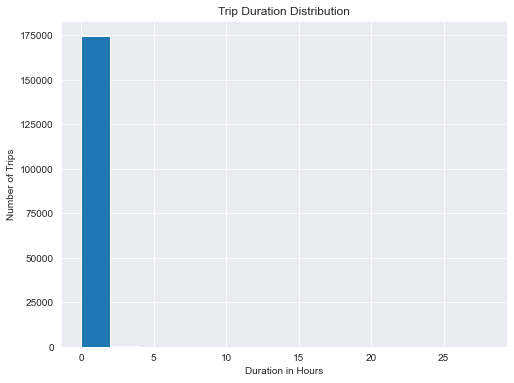

In [139]:
# plot some charts to exploratory the data
plt.figure(figsize=[8, 6])
bins = np.arange(0, df_cleaned['duration_hour'].max()+5, 2)
plt.hist(df_cleaned['duration_hour'], bins=bins);
x_y_t('Duration in Hours','Number of Trips','Trip Duration Distribution');

The most of Date From 0 to 5 so, I will filter out outlier duration from visually examination of the distribution above

In [140]:
df_cleaned = df_cleaned.query('duration_hour <= 5')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174759 entries, 4 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174759 non-null  int64         
 1   start_time               174759 non-null  datetime64[ns]
 2   end_time                 174759 non-null  datetime64[ns]
 3   start_station_id         174759 non-null  object        
 4   start_station_name       174759 non-null  object        
 5   end_station_id           174759 non-null  object        
 6   end_station_name         174759 non-null  object        
 7   bike_id                  174759 non-null  object        
 8   user_type                174759 non-null  category      
 9   member_birth_year        174759 non-null  float64       
 10  member_gender            174759 non-null  category      
 11  bike_share_for_all_trip  174759 non-null  object        
 12  duration_minute 

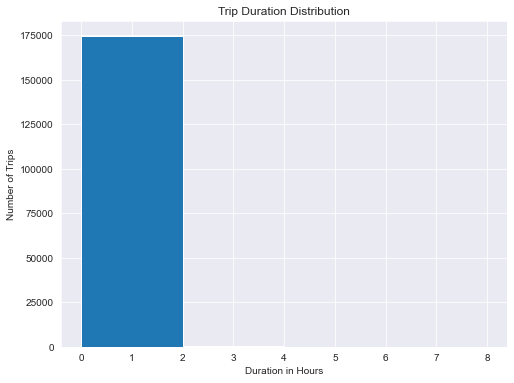

In [141]:
# plot some charts to exploratory the data
plt.figure(figsize=[8, 6])
bins = np.arange(0, df_cleaned['duration_hour'].max()+5, 2)
plt.hist(df_cleaned['duration_hour'], bins=bins);
x_y_t('Duration in Hours','Number of Trips','Trip Duration Distribution');

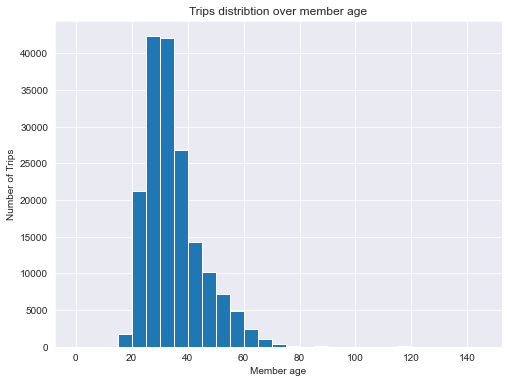

In [142]:
# plot some charts to exploratory the data
plt.figure(figsize=[8, 6])
bins = np.arange(0, df_cleaned['member_age'].max()+5, 5)
plt.hist(df_cleaned['member_age'], bins=bins);
x_y_t('Member age','Number of Trips','Trips distribtion over member age');

The most of Date Till 80 year so, I will filter out outlier member_age from visually examination of the distribution above

In [143]:
df_cleaned = df_cleaned.query('member_age <= 80')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174567 entries, 4 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174567 non-null  int64         
 1   start_time               174567 non-null  datetime64[ns]
 2   end_time                 174567 non-null  datetime64[ns]
 3   start_station_id         174567 non-null  object        
 4   start_station_name       174567 non-null  object        
 5   end_station_id           174567 non-null  object        
 6   end_station_name         174567 non-null  object        
 7   bike_id                  174567 non-null  object        
 8   user_type                174567 non-null  category      
 9   member_birth_year        174567 non-null  float64       
 10  member_gender            174567 non-null  category      
 11  bike_share_for_all_trip  174567 non-null  object        
 12  duration_minute 

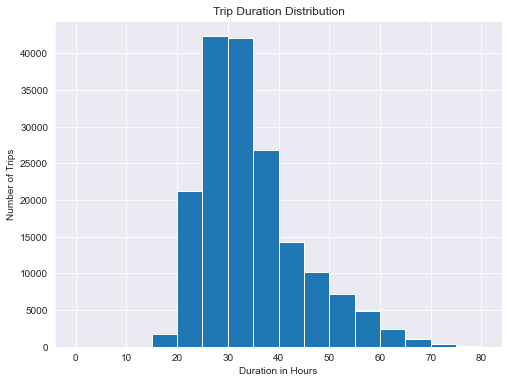

In [144]:
# plot some charts to exploratory the data
plt.figure(figsize=[8, 6])
bins = np.arange(0, df_cleaned['member_age'].max()+5, 5)
plt.hist(df_cleaned['member_age'], bins=bins);
x_y_t('Duration in Hours','Number of Trips','Trip Duration Distribution');

In [145]:
# Save Cleaned dataset
df_cleaned.to_csv('Cleaned.csv',index=False)

In [146]:
df=pd.read_csv('Cleaned.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,duration_hour,start_date,start_hourofday,start_dayofweek,start_month,member_age
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.416667,0.440278,2019-02-28,23,Thursday,February,45.0
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,29.883333,0.498056,2019-02-28,23,Thursday,February,60.0
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,19.116667,0.318611,2019-02-28,23,Thursday,February,36.0
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No,26.916667,0.448611,2019-02-28,23,Thursday,February,30.0
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,No,26.166667,0.436111,2019-02-28,23,Thursday,February,31.0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174567 non-null  int64  
 1   start_time               174567 non-null  object 
 2   end_time                 174567 non-null  object 
 3   start_station_id         174567 non-null  float64
 4   start_station_name       174567 non-null  object 
 5   end_station_id           174567 non-null  float64
 6   end_station_name         174567 non-null  object 
 7   bike_id                  174567 non-null  int64  
 8   user_type                174567 non-null  object 
 9   member_birth_year        174567 non-null  float64
 10  member_gender            174567 non-null  object 
 11  bike_share_for_all_trip  174567 non-null  object 
 12  duration_minute          174567 non-null  float64
 13  duration_hour            174567 non-null  float64
 14  star

### What is the structure of your dataset?

The original combined data contains approximately 183,412 trip records with 16 variables collected. The variables can be divided into Three categories:

> The duration: `duration_sec`, `start_time`, `end_time`
> station info: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`
> member info: `bike_id`, `user_type`, `member_birth_year`, `member_gender`, `bike_share_for_all_trip`

Derived variables to assist analysis:
> More info about Duration: `duration_minute`,`duration_hour`, `start_date`, `start_hourofday`, `start_dayofweek`, `start_month`
> member info: `member_age`

### What is/are the main feature(s) of interest in your dataset?
I am interested in investigate duration of biking time.
When are most trips taken in terms of time of day, day of the week, or month of the year?
How long does the average trip take? 
Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the following features may help to support my investigation 
> - `duration_minute`,`duration_hour`, `start_date`, `start_hourofday`, `start_dayofweek`, `start_month`
> - `member_age`
> - `member_gender`
> - `user_type`

## Univariate Exploration

>- Explore the trips distribution over hour-of-day, day-of-week and month
>- Explore riders User-type, member_gender, bike_share_for_all_trip and member_age.
>- Explore Trip duration duration_minute.

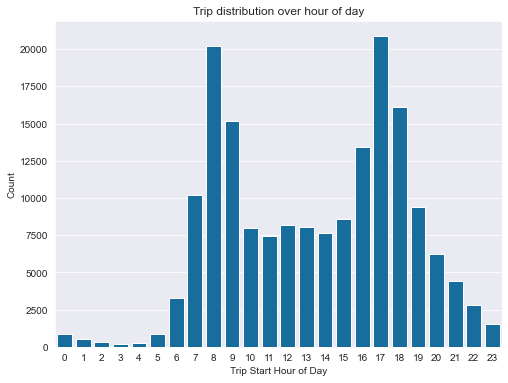

In [148]:
# trip distribution over hour of day 

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df, x='start_hourofday', color=base_color);

x_y_t('Trip Start Hour of Day','Count','Trip distribution over hour of day');

It is quite Observed that the majority of rides happened in hours around two timeframes, 7am-9am and 16pm-18pm

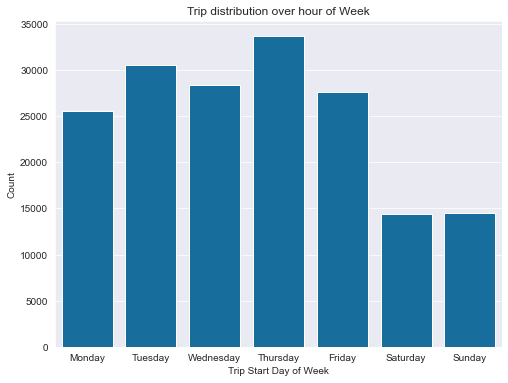

In [149]:
# trip distribution over Day of Week

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_dayofweek'] = df['start_dayofweek'].astype(weekdaycat)

sb.countplot(data=df, x='start_dayofweek', color=base_color);

x_y_t('Trip Start Day of Week','Count','Trip distribution over hour of Week');

It is quite Observed that the majority of rides happened on work days (Tuesday-Tursday) 
and miniorty od rides happened on Weekend days (Saturday and Sunday)

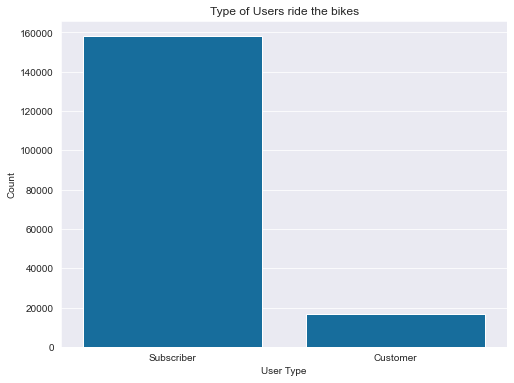

In [150]:
# Type of Users ride the bikes

sb.countplot(data=df, x='user_type', color=base_color);

x_y_t('User Type','Count','Type of Users ride the bikes');

It is Observed that the majority riders is Subscribers

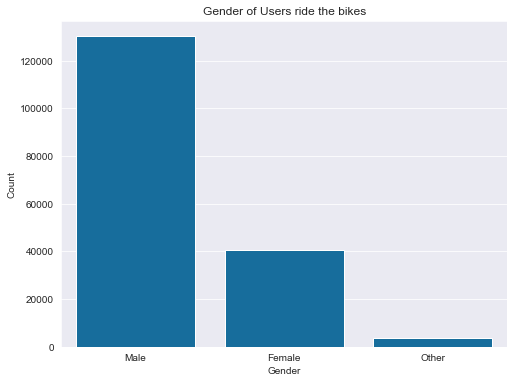

In [151]:
# Gender of Users ride the bikes

sb.countplot(data=df, x='member_gender', color=base_color);

x_y_t('Gender','Count','Gender of Users ride the bikes');

It is Observed that the majority riders is Male

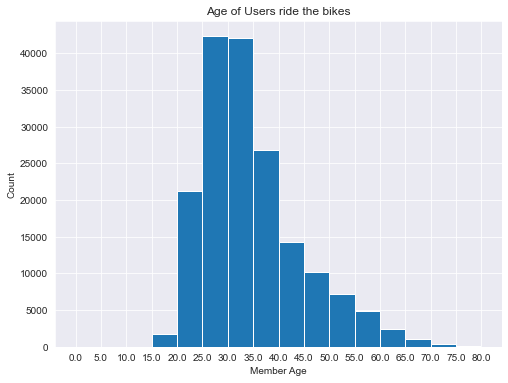

In [152]:
# Age of Users ride the bikes

bins = np.arange(0, df['member_age'].max()+5, 5)
plt.hist(data=df, x='member_age', bins=bins);
plt.xticks(bins, bins);

x_y_t('Member Age','Count','Age of Users ride the bikes');

It is Observed that the majority riders age is between 25 year to 35 year

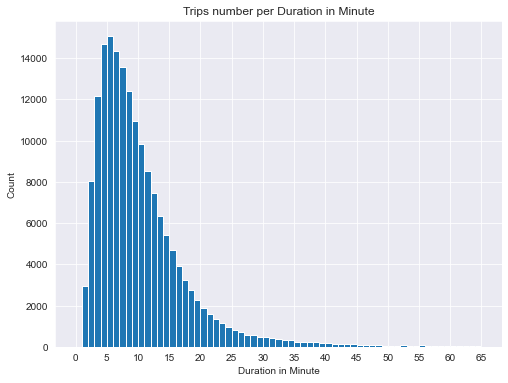

In [153]:
# Explore the trip duration 

bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);

x_y_t('Duration in Minute','Count','Trips number per Duration in Minute');

It is Observed that the majority Duration between 5 to 10 minutes

**Observations from above plots:**

>- the majority of rides happened in hours around two timeframes, 7am-9am and 16pm-18pm
>- the majority of rides happened on work days (Tuesday-Tursday) and miniorty od rides happened on Weekend days (Saturday and Sunday).
>- the majority riders is Subscribers
>- the majority riders is Male
>- the majority riders age is between 25 year to 35 year
>- the majority trips duration between 5 to 10 minutes

## Bivariate Exploration

>- How does the trip duration distribution vary between customers and subscribers?
>- How does the trip duration distribution vary between members gender?
>- How does the trip duration distribution vary between Days of Week?
>- How does riders' member age vary between Days of Week?
>- How does riders' member age vary between between customers and subscribers?

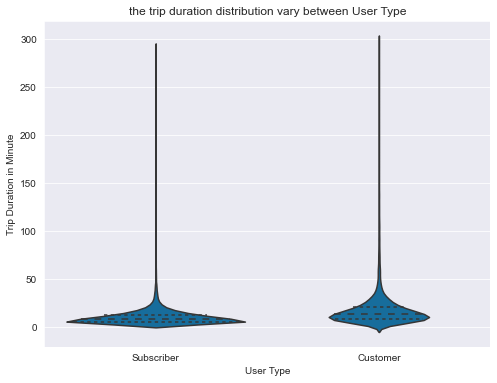

In [154]:
# How does the trip duration distribution vary between customers and subscribers?

sb.violinplot(data=df, x='user_type', y='duration_minute', color=base_color, inner='quartile');

x_y_t('User Type','Trip Duration in Minute','the trip duration distribution vary between User Type');

Subscriber user is the shortest Duration

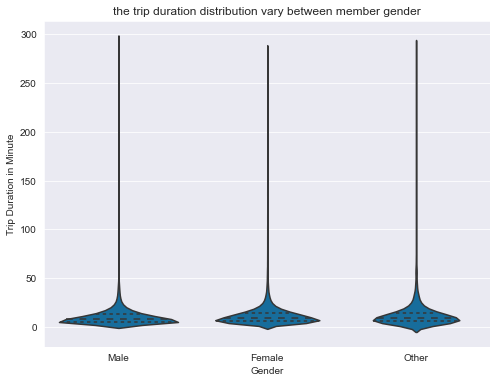

In [155]:
#How does the trip duration distribution vary between members gender?

sb.violinplot(data=df, x='member_gender', y='duration_minute', color=base_color, inner='quartile');

x_y_t('Gender','Trip Duration in Minute','the trip duration distribution vary between member gender');

Male members is the shortest Duration

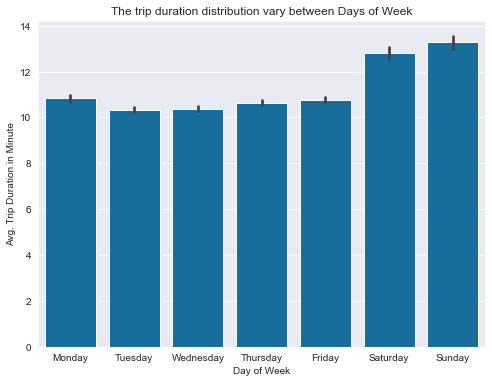

In [156]:
# How does the trip duration distribution vary between Days of Week?

sb.barplot(data=df, x='start_dayofweek', y='duration_minute', color=base_color);

x_y_t('Day of Week','Avg. Trip Duration in Minute','The trip duration distribution vary between Days of Week');

Saturday and Sunday is the longest Duration

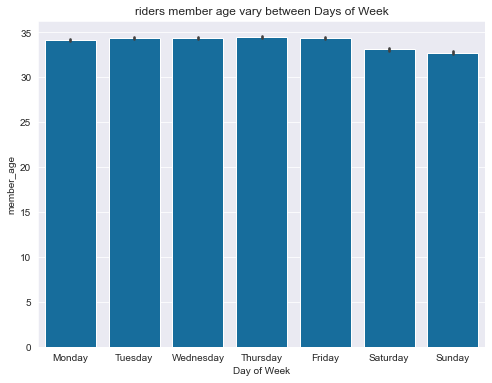

In [157]:
# How does riders' member age vary between Days of Week?

sb.barplot(data=df, x='start_dayofweek', y='member_age', color=base_color);

x_y_t('Day of Week','member_age','riders member age vary between Days of Week');

the riders who used the bicks in saturday and sunday is more youngest

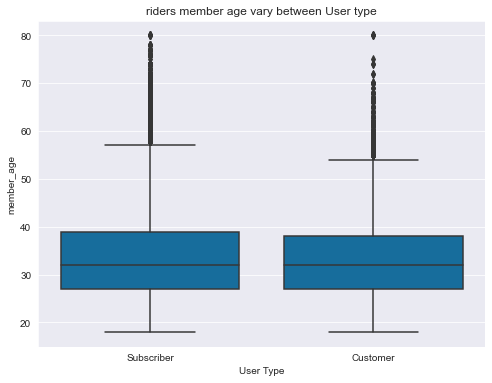

In [158]:
# How does riders' member age vary between between customers and subscribers?

sb.boxplot(data=df, x='user_type', y='member_age', color=base_color);

x_y_t('User Type','member_age','riders member age vary between User type');

Customer riders is the youngest

**Observations from above plots:**

>- Subscriber user is the shortest Duration
>- Male members is the shortest Duration
>- Saturday and Sunday is the longest Duration
>- the riders who used the bicks in saturday and sunday is more youngest
>-Customer riders is the youngest

## Multivariate Exploration

>- How does the average trip duration vary in weekdays between customers and subscribers?
>- How does riders member gender vary in weekdays between customers and subscribers?

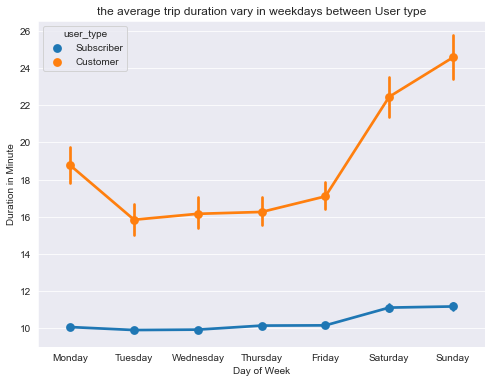

In [159]:
# How does the average trip duration vary in weekdays between customers and subscribers?

sb.pointplot(data=df, x='start_dayofweek', y='duration_minute', hue='user_type');

x_y_t('Day of Week','Duration in Minute','the average trip duration vary in weekdays between User type');

The subscribers ride much shorter trips compared to customers 

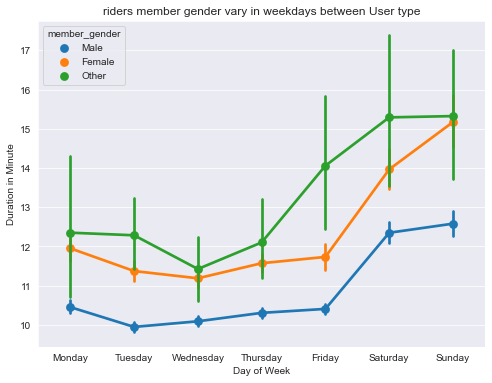

In [160]:
# How does riders member gender vary in weekdays between customers and subscribers?

sb.pointplot(data=df, x='start_dayofweek', y='duration_minute', hue='member_gender');

x_y_t('Day of Week','Duration in Minute','riders member gender vary in weekdays between User type');

Male riders are the shortest trips

**Observations from above plots:**

>- The subscribers ride much shorter trips duration compared to customers Over all days of week
>- Male riders are the shortest trip duration Over all days of week